In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
from fastai.vision import *
from vae import *
import seaborn as sns

In [3]:
mnist = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)

In [8]:
data = (ImageImageList.from_folder(mnist/'train')
        .split_by_rand_pct(0.1, seed=42)
        .label_from_func(lambda x: x)
        .transform(tfms)
        .databunch(num_workers=0, bs=16)
        .normalize(do_y=True))

In [9]:
data

ImageDataBunch;

Train: LabelList (639 items)
x: ImageImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\C64062\.fastai\data\mnist_tiny\train;

Valid: LabelList (70 items)
x: ImageImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: C:\Users\C64062\.fastai\data\mnist_tiny\train;

Test: None

In [25]:
image_size = data.one_batch()[0].shape[-1]
vae = VAE(size_in = image_size, size_emb=2)
my_learner = Learner(data,
                     vae,
                     opt_func=torch.optim.Adam,
                     loss_func=vae.vae_loss_function)

## Find the learning rate

In [ ]:
my_learner.lr_find()

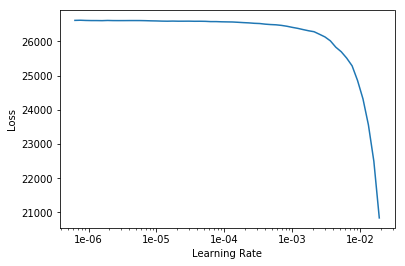

In [114]:
my_learner.recorder.plot()

## Fit for 5 epochs

In [14]:
my_learner.fit(5, 1e-2)

epoch,train_loss,valid_loss,time
0,-187683.203125,-493635.093750,00:05
1,-513658.718750,-689428.625000,00:05
2,-637746.500000,-705161.812500,00:05
3,-686498.500000,-697282.312500,00:05
4,-708810.250000,-685905.937500,00:05


## Show 4 samples and their reconstructions

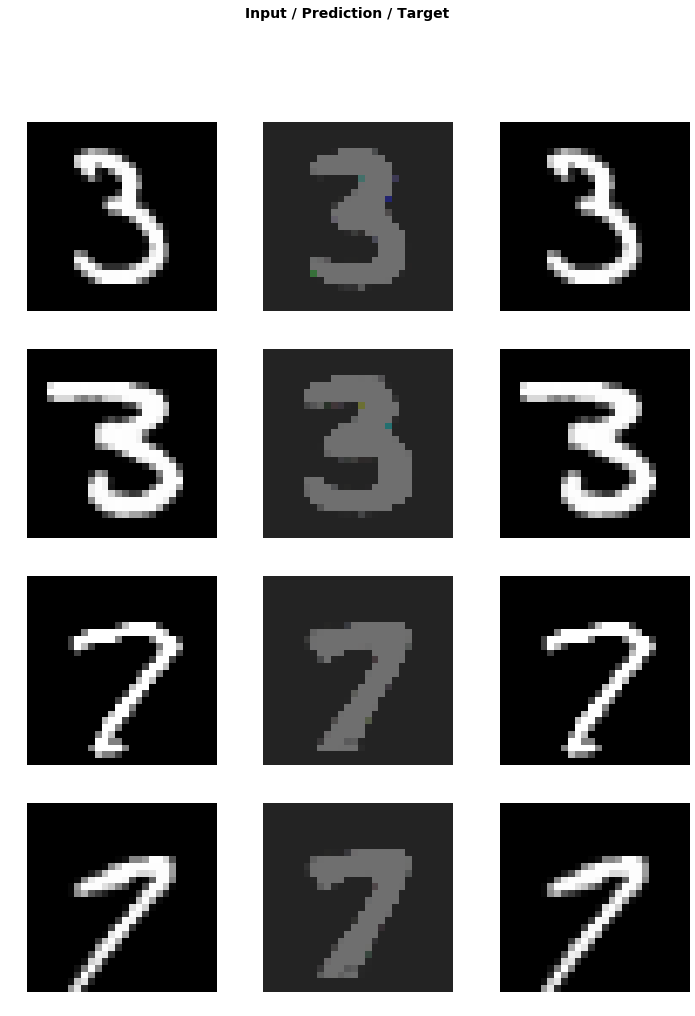

In [15]:
my_learner.show_results(rows=4)

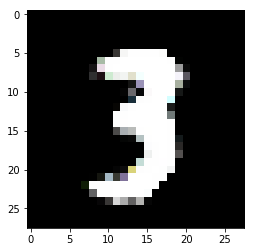

In [16]:
sample = torch.randn(64, 2)
epoch = 5
sample = vae.decode(sample).cpu()
plt.imshow(sample[0].permute(1, 2, 0))

In [24]:
save_image(sample.view(64, 3, 28, 28), 'results/sample_' + str(epoch) + '.png')

## Plot samples in 2D space

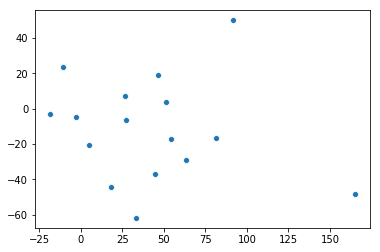

In [152]:
emb = vae.encode(data.one_batch()[0])
sns.scatterplot(x=emb[0][:, 0], y=emb[0][:, 1])